In [1]:
# IMPORT REQUIRED LIBRARIES

import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
# upper / lower / sample

df.head(2)
df.tail(2)
df.sample(10)

,age,sex,bmi,children,smoker,region,expenses
146,46,male,30.5,3,yes,northwest,40720.55
1194,31,female,21.8,0,no,northwest,4134.08
1281,47,female,27.6,2,yes,northwest,24535.70
1065,42,female,25.3,1,no,southwest,7045.50
459,40,female,33.0,3,no,southeast,7682.67
540,34,female,38.0,3,no,southwest,6196.45
1009,51,male,27.7,1,no,northeast,9957.72
1215,18,male,39.1,0,no,northeast,12890.06
1264,49,female,33.3,2,no,northeast,10370.91
763,27,male,26.0,0,no,northeast,3070.81


In [ ]:
# turning all; the categorical variables into numbers

df_one_hot = pd.get_dummies(df)

df_one_hot.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


In [ ]:

# create x and y for the dataset

x = df_one_hot.drop("expenses",axis=1)

y = df_one_hot["expenses"]

In [ ]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [ ]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
                                                    x,
                                                    y,
                                                    test_size =0.2,
                                                    random_state = 42
)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [ ]:
# create a new model

model = tf.keras.Sequential([

                              tf.keras.layers.Dense(64),
                              tf.keras.layers.Dense(32),
                              tf.keras.layers.Dense(1)
])

model.compile(
              loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"]
)

history = model.fit(x_train,y_train,epochs = 100,verbose = 1)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13292.7588 - mae: 13292.7588
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13086.5312 - mae: 13086.5312
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12579.8955 - mae: 12579.8955
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11488.2988 - mae: 11488.2988
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9773.0967 - mae: 9773.0967
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8125.5737 - mae: 8125.5737
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7494.3320 - mae: 7494.3320
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7445.1118 - mae: 7445.1118
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7422.6792 - mae: 7422.6792
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7397.2534 - mae: 7

In [ ]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3740.0691 - mae: 3740.0691


[3740.069091796875, 3740.069091796875]

Text(0.5, 0, 'epochs')

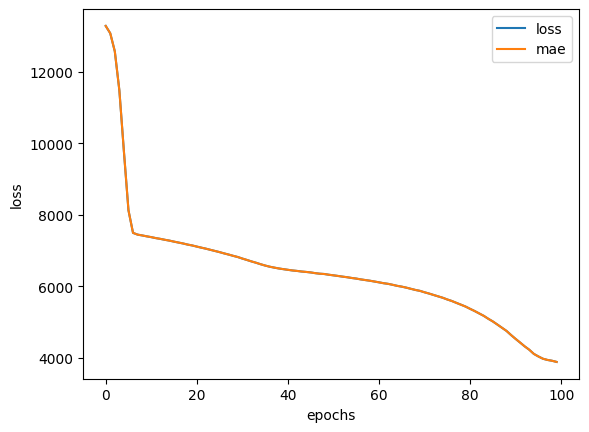

In [ ]:
# loss curve

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
"""

training the same model but for 200 epochs to see the loss reduction

"""

In [ ]:
# create a new model

model_2 = tf.keras.Sequential([

                              tf.keras.layers.Dense(64),
                              tf.keras.layers.Dense(32),
                              tf.keras.layers.Dense(1)
])

model_2.compile(
              loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"]
)

history_2 = model_2.fit(x_train,y_train,epochs = 200,verbose = 1)


Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13273.9170 - mae: 13273.9170
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13037.2891 - mae: 13037.2891
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12444.2305 - mae: 12444.2305
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11218.0391 - mae: 11218.0391
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 9435.6846 - mae: 9435.6846
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7890.5869 - mae: 7890.5869
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7424.3784 - mae: 7424.3784
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7397.8267 - mae: 7397.8267
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7370.0259 - mae: 7370.0259
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7342.8813 - mae: 7

Text(0.5, 0, 'epochs')

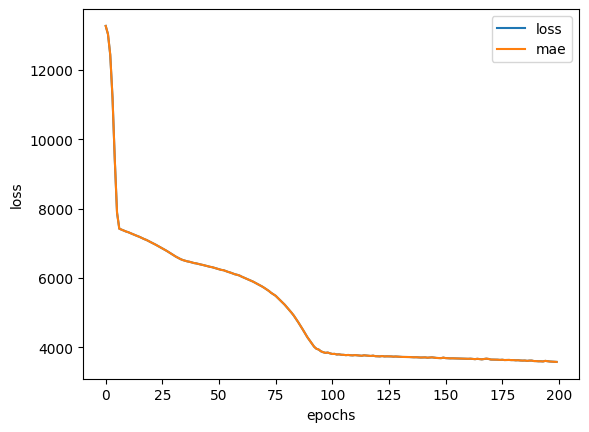

In [ ]:
# loss curve

pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")